In [115]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn
import copy

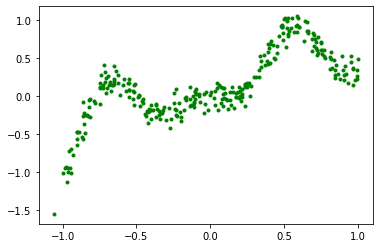

In [116]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

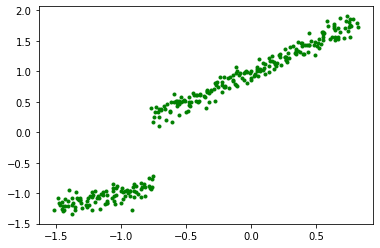

In [117]:
np.random.seed(13)
x = np.linspace(-1.5,0.8,300)
msk = x<-0.75
y = np.zeros_like(x)

# y[msk] = -0.5
# y[~msk] = 1
y[msk] = x[msk]*0.5 - 0.5
y[~msk] = x[~msk]*1 + 1

noise = np.random.normal(0,0.02, x.shape)
x = x + noise

indx = np.argsort(x)
x = x[indx]
y = y[indx]

noise = np.random.normal(0,0.1, x.shape)
y = y + noise

xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

## Gradient to minimize variance

1. Initialize decision boundary
2. Compute decision regression/mean on each splits
3. Find direction where the variance will be reduced.   
---------This is because the gaussian based error does not explicitly minimize the variance of the split.
4. Update the decision boundary.

In [118]:
optim = tnn.SGD(0.01)
linear = tnn.LinearLayer(1,1,optimizer=optim)
c0 = 0
c1 = 0

In [119]:
prob = linear.forward(xx)
mask0 = prob>0
mask1 = ~mask0
c0 = yy[mask0].mean()
c1 = yy[mask1].mean()
yout = c0*mask0 + c1*mask1

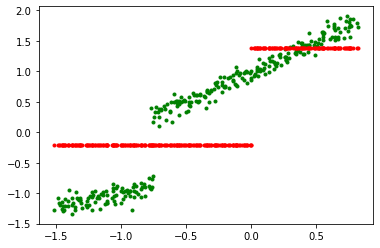

In [120]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), marker='.', color='r')
plt.show()

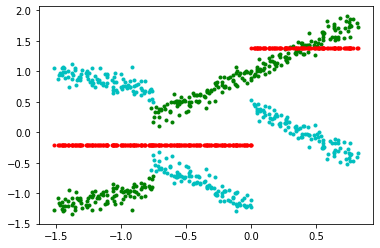

(0.26603122122969125, 0.8616213357346557)

In [121]:
dy = yout - yy
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), marker='.', color='r')
plt.scatter(x, dy.reshape(-1), marker='.', color='c')
plt.show()

dy0 = dy[mask0].std()
dy1 = dy[mask1].std()
dy0, dy1

In [122]:
c0, c1

(1.3907889949789063, -0.2178549559529393)

In [ ]:
## What gradient will reudce the total error !!!!!!

## Spline based

In [108]:
import mylibrary.splinelib as tsp

In [109]:
spline = tsp.Spline1D(3, xx,yy)
spline.n_max = 4
lr = 0.1
### constrainting
# mp = (spline.X[1] + spline.X[2])/2
# spline.X[1], spline.X[2] = mp-9e-9, mp+9e-9#mp-spline.eps, mp+spline.eps

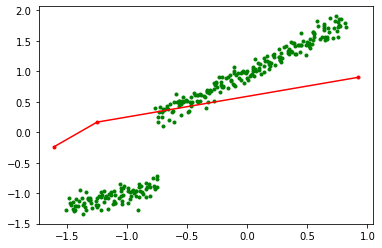

In [110]:
yout = spline.forward(x)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline.X, spline.Y, marker='.', color='r')
plt.show()

In [ ]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for step in range(100000):

    ## constrainting
    if spline.n_points == 4:
        mp = (spline.X[1] + spline.X[2])/2
        spline.X[1], spline.X[2] = mp-9e-9, mp+9e-9#mp-spline.eps, mp+spline.eps

    yout = spline.forward(x)
    dy = yout-y
    dx = spline.backward(dy)
    spline.update(lr)
    
    
    if step % 10 == 0:            
        error = (dy**2).mean()
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
        plt.scatter(x, y, marker='.', color='g')
        plt.plot(spline.X, spline.Y, marker='.', color='r')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

In [112]:
spline._add_new_point_()

In [113]:
spline.Y

array([-1.81964403, -0.68980251,  0.44003902,  1.99683206])